In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Descriptive Analytics

In [267]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [268]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [270]:
df.shape

(4521, 17)

In [271]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

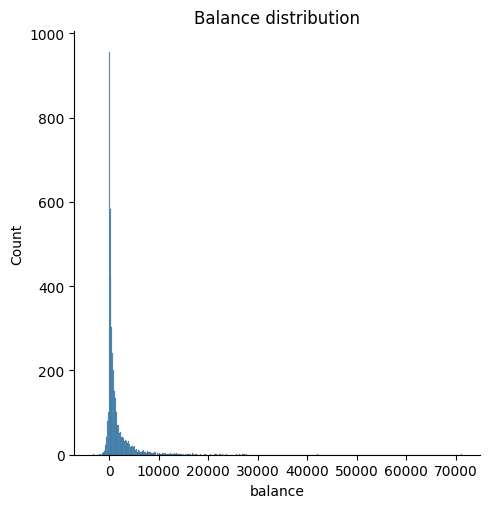

In [272]:
#Distribution plots
sns.displot(df['balance'])
plt.title('Balance distribution')
plt.show()

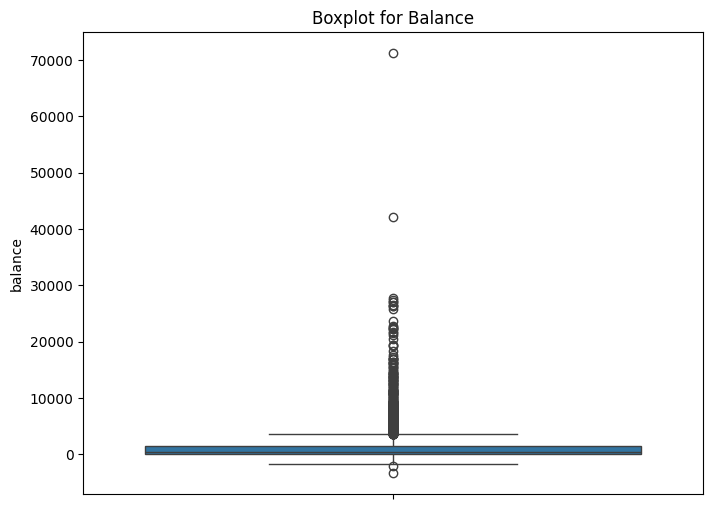

In [273]:
#Visualise outliers in Balance
plt.figure(figsize=(8,6))
sns.boxplot(df['balance'])
plt.title("Boxplot for Balance")
plt.show()

In [274]:
#Unique values for column
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [275]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [276]:
#Create a new dataframe copying original df to not tamper with original data 
df2 = df.copy()

In [277]:
#Unique values
df2['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [278]:
#Creating a dictionary to map object columns to treat them to be numeric. Creating a dictionary to make converting columns cleaner
mapping_dict = {
    'marital': {'single': 0, 'married': 1, 'divorced': 2},
    'default': {'yes': 1, 'no': 0},
    'education': {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'yes': 1, 'no': 0},
}

for col, mapping in mapping_dict.items():
    df2[col] = df2[col].map(mapping)

print(df2)

      age            job  marital  education  default  balance  housing  loan  \
0      30     unemployed        1          1        0     1787        0     0   
1      33       services        1          2        0     4789        1     1   
2      35     management        0          3        0     1350        1     0   
3      30     management        1          3        0     1476        1     1   
4      59    blue-collar        1          2        0        0        1     0   
...   ...            ...      ...        ...      ...      ...      ...   ...   
4516   33       services        1          2        0     -333        1     0   
4517   57  self-employed        1          3        1    -3313        1     1   
4518   57     technician        1          2        0      295        0     0   
4519   28    blue-collar        1          2        0     1137        0     0   
4520   44   entrepreneur        0          3        0     1136        1     1   

       contact  day month  

In [279]:
print(df2['job'].isnull().sum())

0


In [280]:
df2['job_numeric'] = pd.factorize(df2['job'])[0]

In [281]:
print(df2['job_numeric'].isnull().sum())

0


In [282]:
#Descriptive overview of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4521 non-null   int64 
 1   job          4521 non-null   object
 2   marital      4521 non-null   int64 
 3   education    4521 non-null   int64 
 4   default      4521 non-null   int64 
 5   balance      4521 non-null   int64 
 6   housing      4521 non-null   int64 
 7   loan         4521 non-null   int64 
 8   contact      4521 non-null   object
 9   day          4521 non-null   int64 
 10  month        4521 non-null   object
 11  duration     4521 non-null   int64 
 12  campaign     4521 non-null   int64 
 13  pdays        4521 non-null   int64 
 14  previous     4521 non-null   int64 
 15  poutcome     4521 non-null   object
 16  y            4521 non-null   object
 17  job_numeric  4521 non-null   int64 
dtypes: int64(13), object(5)
memory usage: 635.9+ KB


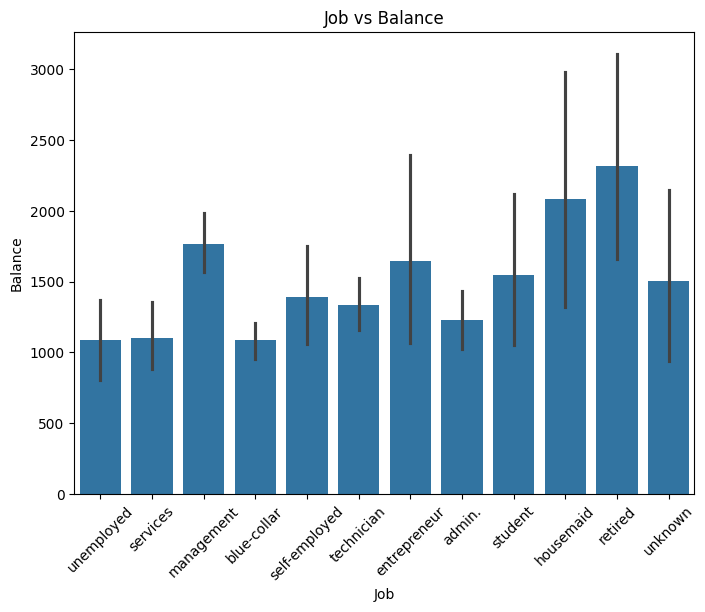

In [283]:
#Visualise Job category vs Balance
plt.figure(figsize=(8,6))
sns.barplot(x = 'job', y = 'balance', data = df)
plt.title('Job vs Balance')
plt.xlabel('Job')
plt.ylabel('Balance')
#Rotate category titles 45 degrees to increase readability
plt.xticks(rotation = 45)
plt.show()

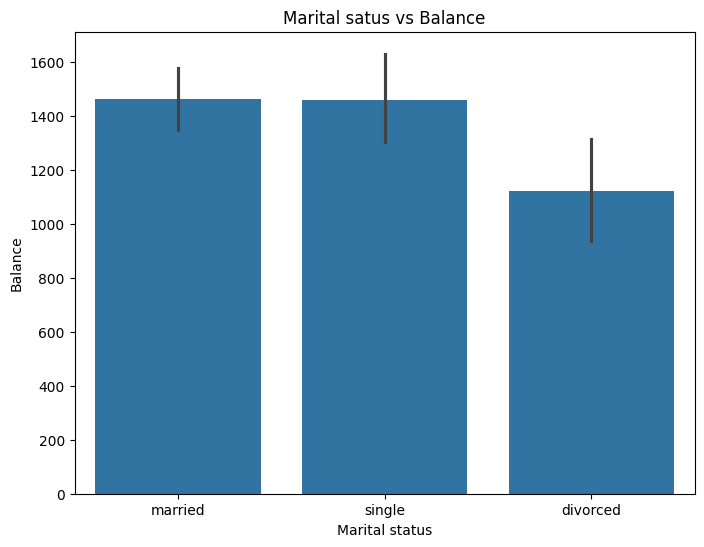

In [284]:
#Visualising balance by marital status 
plt.figure(figsize=(8,6))
sns.barplot(x = 'marital', y = 'balance', data = df)
plt.title('Marital satus vs Balance')
plt.xlabel('Marital status')
plt.ylabel('Balance')
plt.show()

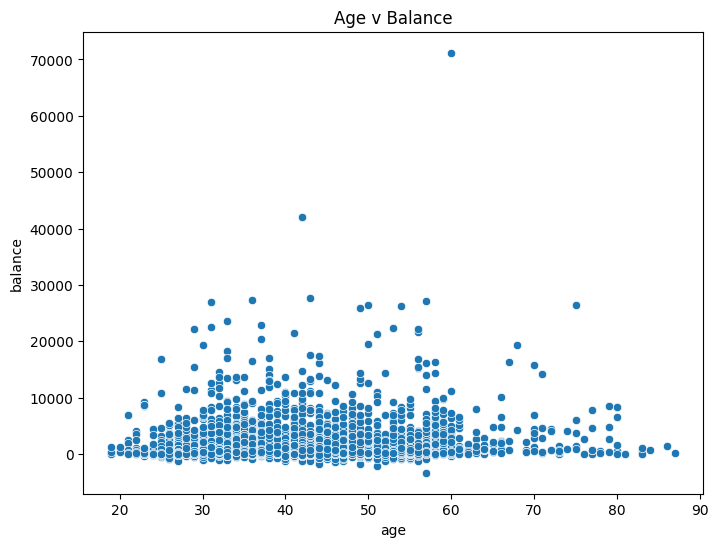

In [285]:
#Visualising age wise balance and identifying significant outliers 
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'age', y = 'balance', data = df)
plt.title('Age v Balance')
plt.show()

The outliers catch immediate attention showing a balance of above 70000 being in the 60 year age group. Apart from the striking outlier, there are other significant outliers. The mean balance is 1422.65 and as evidenced in the scatterplot, a number of values lie outside the mean which could prove to be significant.

Data Analysis

In [286]:
#Filter df and store values that have a balance greater than 10,000 in 'filtered_vals_df' 
filtered_vals_df = df[df['balance'] > 10000][['job', 'marital', 'loan', 'y', 'poutcome', 'balance']]
print('Values with balance higher than 10,000: ')
print(filtered_vals_df)

Values with balance higher than 10,000: 
                job  marital loan   y poutcome  balance
40       management   single   no  no  failure    11971
64           admin.  married   no  no  unknown    16873
94      blue-collar  married   no  no  unknown    14093
213   self-employed  married   no  no  unknown    11494
272      management  married   no  no  unknown    12186
...             ...      ...  ...  ..      ...      ...
4363    blue-collar   single   no  no  failure    13156
4369     technician  married   no  no  unknown    16063
4394    blue-collar  married   no  no  unknown    10910
4440    blue-collar  married   no  no  unknown    13117
4441     management  married   no  no  unknown    12877

[92 rows x 6 columns]


92 out of 4521 rows have been filtered as having a balance greater than 10,000.

In [287]:
#Individuals with a balance greater than 30,000
super_high = filtered_vals_df[filtered_vals_df['balance'] > 30000]
print(super_high)

               job  marital loan   y poutcome  balance
2989  entrepreneur  married   no  no  unknown    42045
3700       retired  married   no  no  unknown    71188


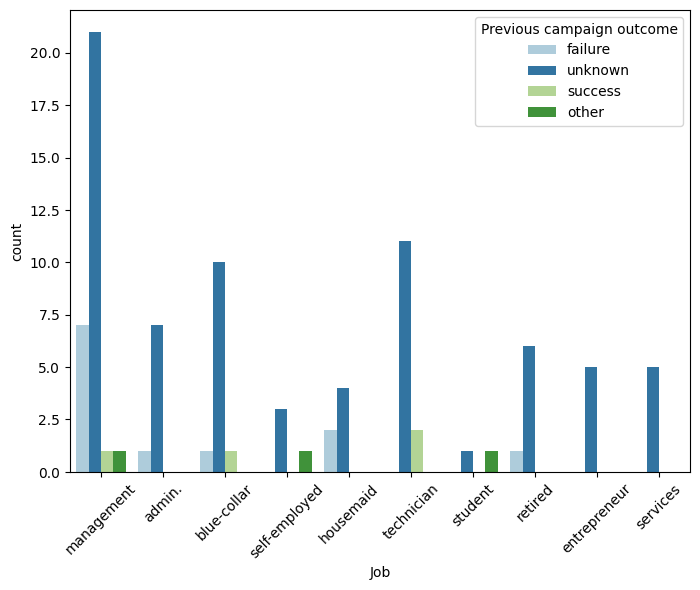

In [288]:
#Visualise previous Campaign outcomes for filtered data by job category
plt.figure(figsize=(8,6))
sns.countplot(data = filtered_vals_df, x = 'job', hue = 'poutcome', palette = 'Paired')
plt.xlabel('Job')
plt.xticks(rotation = 45)
plt.legend(title = 'Previous campaign outcome')
plt.show()

In [289]:
#Filter data for average and below average customers holding a balance of average 1422 or lower
below_average_filtered_df =  df[df['balance'] < 1422.65][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Values with balance less than the average of 1422: ')
print(below_average_filtered_df)

Values with balance less than the average of 1422: 
                job  marital loan  balance   y poutcome
2        management   single   no     1350  no  failure
4       blue-collar  married   no        0  no  unknown
5        management   single   no      747  no  failure
6     self-employed  married   no      307  no    other
7        technician  married   no      147  no  unknown
...             ...      ...  ...      ...  ..      ...
4516       services  married   no     -333  no  unknown
4517  self-employed  married  yes    -3313  no  unknown
4518     technician  married   no      295  no  unknown
4519    blue-collar  married   no     1137  no    other
4520   entrepreneur   single  yes     1136  no    other

[3359 rows x 6 columns]


In [290]:
#Successful campaign outcomes
successful_campaign =  df[df['poutcome'] == 'success'][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Successful previous campaigns: ')
print(successful_campaign)

Successful previous campaigns: 
              job   marital loan  balance    y poutcome
49         admin.   married   no     4629  yes  success
70     management   married   no        0  yes  success
98    blue-collar  divorced   no     2843   no  success
110       student    single   no     2488  yes  success
156        admin.   married   no      602  yes  success
...           ...       ...  ...      ...  ...      ...
4309     services    single   no     1547   no  success
4323      retired  divorced   no        0   no  success
4433   management   married  yes      -17  yes  success
4458   management    single   no      572  yes  success
4459       admin.    single   no      223   no  success

[129 rows x 6 columns]


In [291]:
#Failed campaign outcomes
failed_campaigns = df[df['poutcome'] == 'failure'][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Failed previous campaigns: ')
print(failed_campaigns)

Failed previous campaigns: 
              job  marital loan  balance    y poutcome
1        services  married  yes     4789   no  failure
2      management   single   no     1350   no  failure
5      management   single   no      747   no  failure
9        services  married  yes      -88   no  failure
14    blue-collar  married  yes      360   no  failure
...           ...      ...  ...      ...  ...      ...
4485  blue-collar  married   no      238   no  failure
4489   management  married   no     6945   no  failure
4492   technician   single  yes      309   no  failure
4504  blue-collar   single  yes     1080  yes  failure
4514  blue-collar  married   no     1205   no  failure

[490 rows x 6 columns]


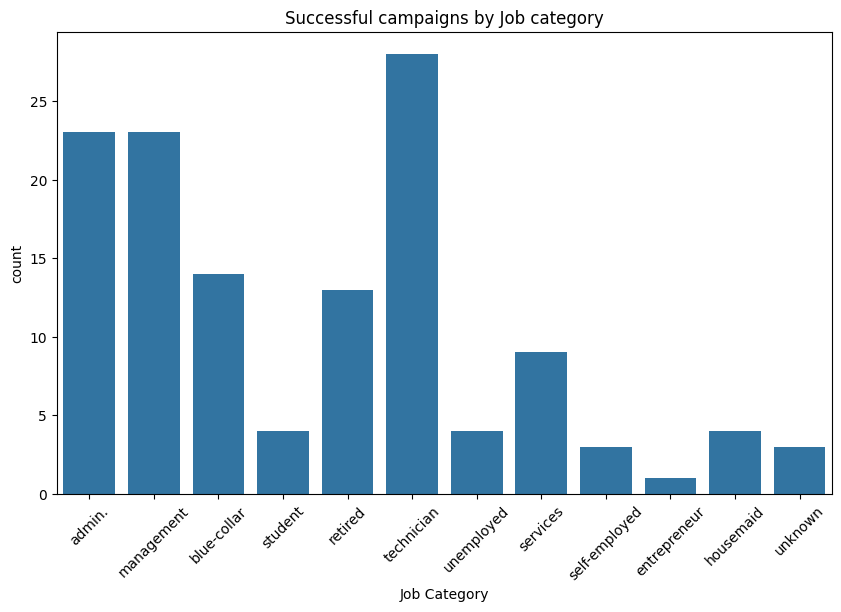

In [292]:
#Visualise Successful campaigns by job category
plt.figure(figsize = (10,6))
sns.countplot(x = 'job', data = successful_campaign)
plt.title("Successful campaigns by Job category")
plt.xlabel("Job Category")
plt.xticks(rotation=45)
plt.show()

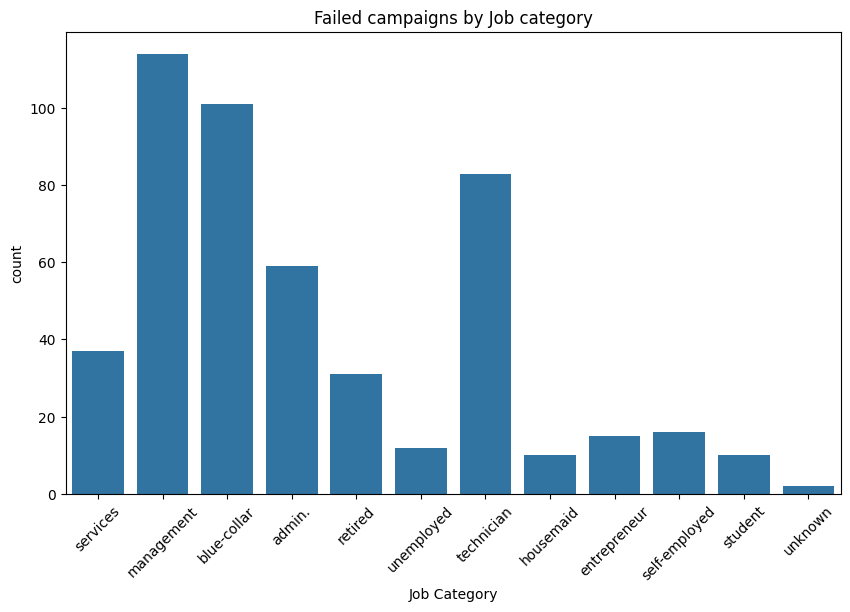

In [293]:
#Visualise failed campaigns by job category
plt.figure(figsize=(10,6))
sns.countplot(x = 'job', data = failed_campaigns)
plt.title('Failed campaigns by Job category')
plt.xlabel('Job Category')
plt.xticks(rotation = 45)
plt.show()

In [294]:
#Print Technicians demographic for marital status as they are the leading job category for successful campaigns
technician_successful_campaign_marital_status = successful_campaign[successful_campaign['job'] == 'technician'][['job', 'marital']]
grouped = technician_successful_campaign_marital_status.groupby('marital').size()
print("Successful campaign outcomes - Technicians marital demographic:")
for name, count in grouped.items():
    print(f"\nMarital status: {name}, Count: {count}")

Successful campaign outcomes - Technicians marital demographic:

Marital status: divorced, Count: 1

Marital status: married, Count: 16

Marital status: single, Count: 11


In [295]:
#Failed campaign outcomes for technicians
technician_failed_campaign_marital_status = failed_campaigns[failed_campaigns['job'] == 'technician'][['job', 'marital']]
grouped = technician_failed_campaign_marital_status.groupby('marital').size()
print("Failed campaign outcomes - Technicians marital demographic:")
for name, count in grouped.items():
    print(f"\nMarital status: {name}, Count: {count}")

Failed campaign outcomes - Technicians marital demographic:

Marital status: divorced, Count: 9

Marital status: married, Count: 45

Marital status: single, Count: 29


In [296]:
month_mapping =  {   'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Convert 'month' column to numbers using mapping dictionary
df2['month'] = df2['month'].map(month_mapping)

print(df2)

      age            job  marital  education  default  balance  housing  loan  \
0      30     unemployed        1          1        0     1787        0     0   
1      33       services        1          2        0     4789        1     1   
2      35     management        0          3        0     1350        1     0   
3      30     management        1          3        0     1476        1     1   
4      59    blue-collar        1          2        0        0        1     0   
...   ...            ...      ...        ...      ...      ...      ...   ...   
4516   33       services        1          2        0     -333        1     0   
4517   57  self-employed        1          3        1    -3313        1     1   
4518   57     technician        1          2        0      295        0     0   
4519   28    blue-collar        1          2        0     1137        0     0   
4520   44   entrepreneur        0          3        0     1136        1     1   

       contact  day  month 

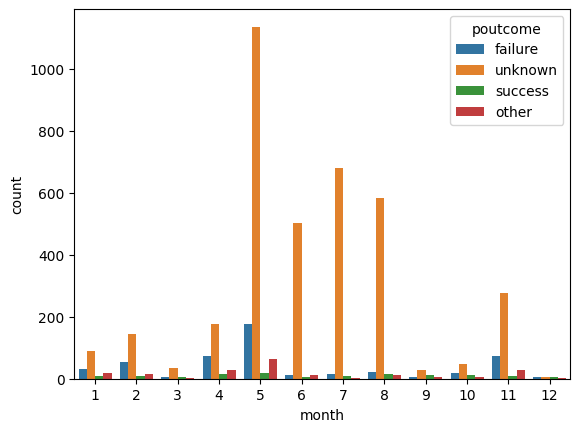

In [297]:
sns.countplot(data = df2, x= 'month', hue = 'poutcome')
plt.show()

In [298]:
poutcome_filtered = df2[(df2['poutcome'] == 'success')][['month', 'duration', 'day']]
grouping = poutcome_filtered.groupby('month').size()
print("Successful outcomes from previous campaign by month:")
for name, count in grouping.items():
    print(f"Month {name}, total {count}")

avg_duration = df2['duration'].mean()
print("\nAverage duration: ", avg_duration)

df2['numeric_poutcome'] = pd.factorize(df2['poutcome'])[0]
correlation = df2[['duration', 'numeric_poutcome']].corr()
print("\n", correlation)
p_value = pearsonr(df2['duration'], df2['numeric_poutcome'])
print(f"p value: {p_value}")
df2.head(20)

Successful outcomes from previous campaign by month:
Month 1, total 9
Month 2, total 8
Month 3, total 7
Month 4, total 15
Month 5, total 20
Month 6, total 6
Month 7, total 9
Month 8, total 16
Month 9, total 11
Month 10, total 11
Month 11, total 10
Month 12, total 7

Average duration:  263.96129174961294

                   duration  numeric_poutcome
duration          1.000000          0.035247
numeric_poutcome  0.035247          1.000000
p value: PearsonRResult(statistic=0.035246989462159206, pvalue=0.01778656616448106)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_numeric,numeric_poutcome
0,30,unemployed,1,1,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,no,0,0
1,33,services,1,2,0,4789,1,1,cellular,11,5,220,1,339,4,failure,no,1,1
2,35,management,0,3,0,1350,1,0,cellular,16,4,185,1,330,1,failure,no,2,1
3,30,management,1,3,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,no,2,0
4,59,blue-collar,1,2,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,no,3,0
5,35,management,0,3,0,747,0,0,cellular,23,2,141,2,176,3,failure,no,2,1
6,36,self-employed,1,3,0,307,1,0,cellular,14,5,341,1,330,2,other,no,4,2
7,39,technician,1,2,0,147,1,0,cellular,6,5,151,2,-1,0,unknown,no,5,0
8,41,entrepreneur,1,3,0,221,1,0,unknown,14,5,57,2,-1,0,unknown,no,6,0
9,43,services,1,1,0,-88,1,1,cellular,17,4,313,1,147,2,failure,no,1,1


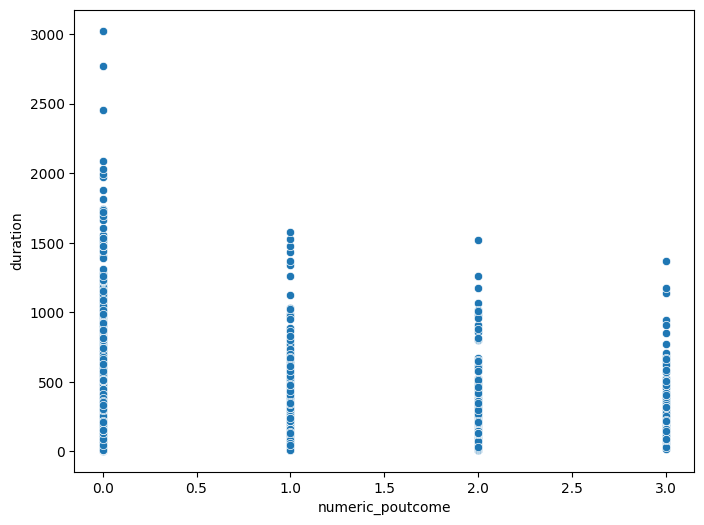

In [299]:
#Visualise duration vs outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'numeric_poutcome', y = 'duration', data = df2)
plt.show()

In [300]:
poutcome_failure_filtered = df2[(df2['poutcome'] == 'failure')][['month']]
grouped = poutcome_failure_filtered.groupby('month').size()
print('Failed outcomes from previous campaign by month:')
for name, count in grouped.items():
    print(f"Month {name}, total: {count}")

Failed outcomes from previous campaign by month:
Month 1, total: 31
Month 2, total: 55
Month 3, total: 5
Month 4, total: 72
Month 5, total: 177
Month 6, total: 11
Month 7, total: 14
Month 8, total: 22
Month 9, total: 7
Month 10, total: 18
Month 11, total: 74
Month 12, total: 4


In [301]:
df2['y_numeric'] = pd.factorize(df2['y'])[0]
df2.corr(numeric_only=True)

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_numeric,numeric_poutcome,y_numeric
age,1.000000,0.381485,-0.199345,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.252828,0.025856,0.045092
marital,0.381485,1.000000,-0.109124,0.020745,-0.024971,0.029851,0.045210,-0.008794,0.051565,-0.006619,-0.005915,-0.017050,-0.038028,0.021122,-0.032186,-0.015042
education,-0.199345,-0.109124,1.000000,-0.008835,0.035731,-0.031251,0.016102,0.013508,0.078297,-0.003246,0.019268,0.006886,0.027320,-0.177297,0.023054,0.050265
default,-0.017885,0.020745,-0.008835,1.000000,-0.070886,0.006881,0.063994,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,-0.002168,-0.031354,0.001303
balance,0.083820,-0.024971,0.035731,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.045592,0.033941,0.017905
housing,-0.193888,0.029851,-0.031251,0.006881,-0.050227,1.000000,0.018451,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.160040,0.006302,-0.104683
loan,-0.011250,0.045210,0.016102,0.063994,-0.071349,0.018451,1.000000,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,0.001375,-0.053685,-0.070517
day,-0.017853,-0.008794,0.013508,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.000306,-0.062505,-0.011244
month,0.073764,0.051565,0.078297,0.008917,0.099872,-0.170922,0.039226,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.027159,-0.044407,0.023335
duration,-0.002367,-0.006619,-0.003246,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,-0.000282,1.000000,-0.068382,0.010380,0.018080,-0.012931,0.035247,0.401118


In [302]:
correlations = df2.corr(numeric_only=True)['y_numeric'].drop('y_numeric')
print("Correlation coefficient for y against all other numerical columns:")
print(correlations)

Correlation coefficient for y against all other numerical columns:
age                 0.045092
marital            -0.015042
education           0.050265
default             0.001303
balance             0.017905
housing            -0.104683
loan               -0.070517
day                -0.011244
month               0.023335
duration            0.401118
campaign           -0.061147
pdays               0.104087
previous            0.116714
job_numeric         0.068978
numeric_poutcome    0.246566
Name: y_numeric, dtype: float64


In [303]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [304]:
scaler = StandardScaler()
numeric_cols = df2.select_dtypes(include=['number'])
scaled_numeric_cols = scaler.fit_transform(numeric_cols)
scaled_df = pd.DataFrame(scaled_numeric_cols, columns = numeric_cols.columns)
correlation_matrix = scaled_df.corr()
print("Correlation matrix: ")
print(correlation_matrix)

Correlation matrix: 
                       age   marital  education   default   balance   housing  \
age               1.000000  0.381485  -0.199345 -0.017885  0.083820 -0.193888   
marital           0.381485  1.000000  -0.109124  0.020745 -0.024971  0.029851   
education        -0.199345 -0.109124   1.000000 -0.008835  0.035731 -0.031251   
default          -0.017885  0.020745  -0.008835  1.000000 -0.070886  0.006881   
balance           0.083820 -0.024971   0.035731 -0.070886  1.000000 -0.050227   
housing          -0.193888  0.029851  -0.031251  0.006881 -0.050227  1.000000   
loan             -0.011250  0.045210   0.016102  0.063994 -0.071349  0.018451   
day              -0.017853 -0.008794   0.013508 -0.013261 -0.008677 -0.031291   
month             0.073764  0.051565   0.078297  0.008917  0.099872 -0.170922   
duration         -0.002367 -0.006619  -0.003246 -0.011615 -0.015950  0.015740   
campaign         -0.005148 -0.005915   0.019268 -0.012348 -0.009976 -0.003574   
pdays  

In [331]:
X = df2[['duration', 'housing', 'pdays', 'previous', 'numeric_poutcome', 'job_numeric', 'age', 'loan', 'marital', 'education', 'default', 'balance', 'campaign']]
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8968312453942521


In [334]:
X = df2[['duration', 'housing', 'pdays', 'previous', 'numeric_poutcome', 'job_numeric']]
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8901989683124539


In [312]:
from sklearn.metrics import confusion_matrix

In [335]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(cm)

tp, tn, fp, fn = cm.ravel()
print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False negatives: ", fn)

Confusion matrix: 
[[1169   36]
 [ 113   39]]
True Positives:  1169
True Negatives:  36
False Positives:  113
False negatives:  39


In [324]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DT accuracy: 0.8526160648489315
Confusion matrix
[[1104  101]
 [  99   53]]


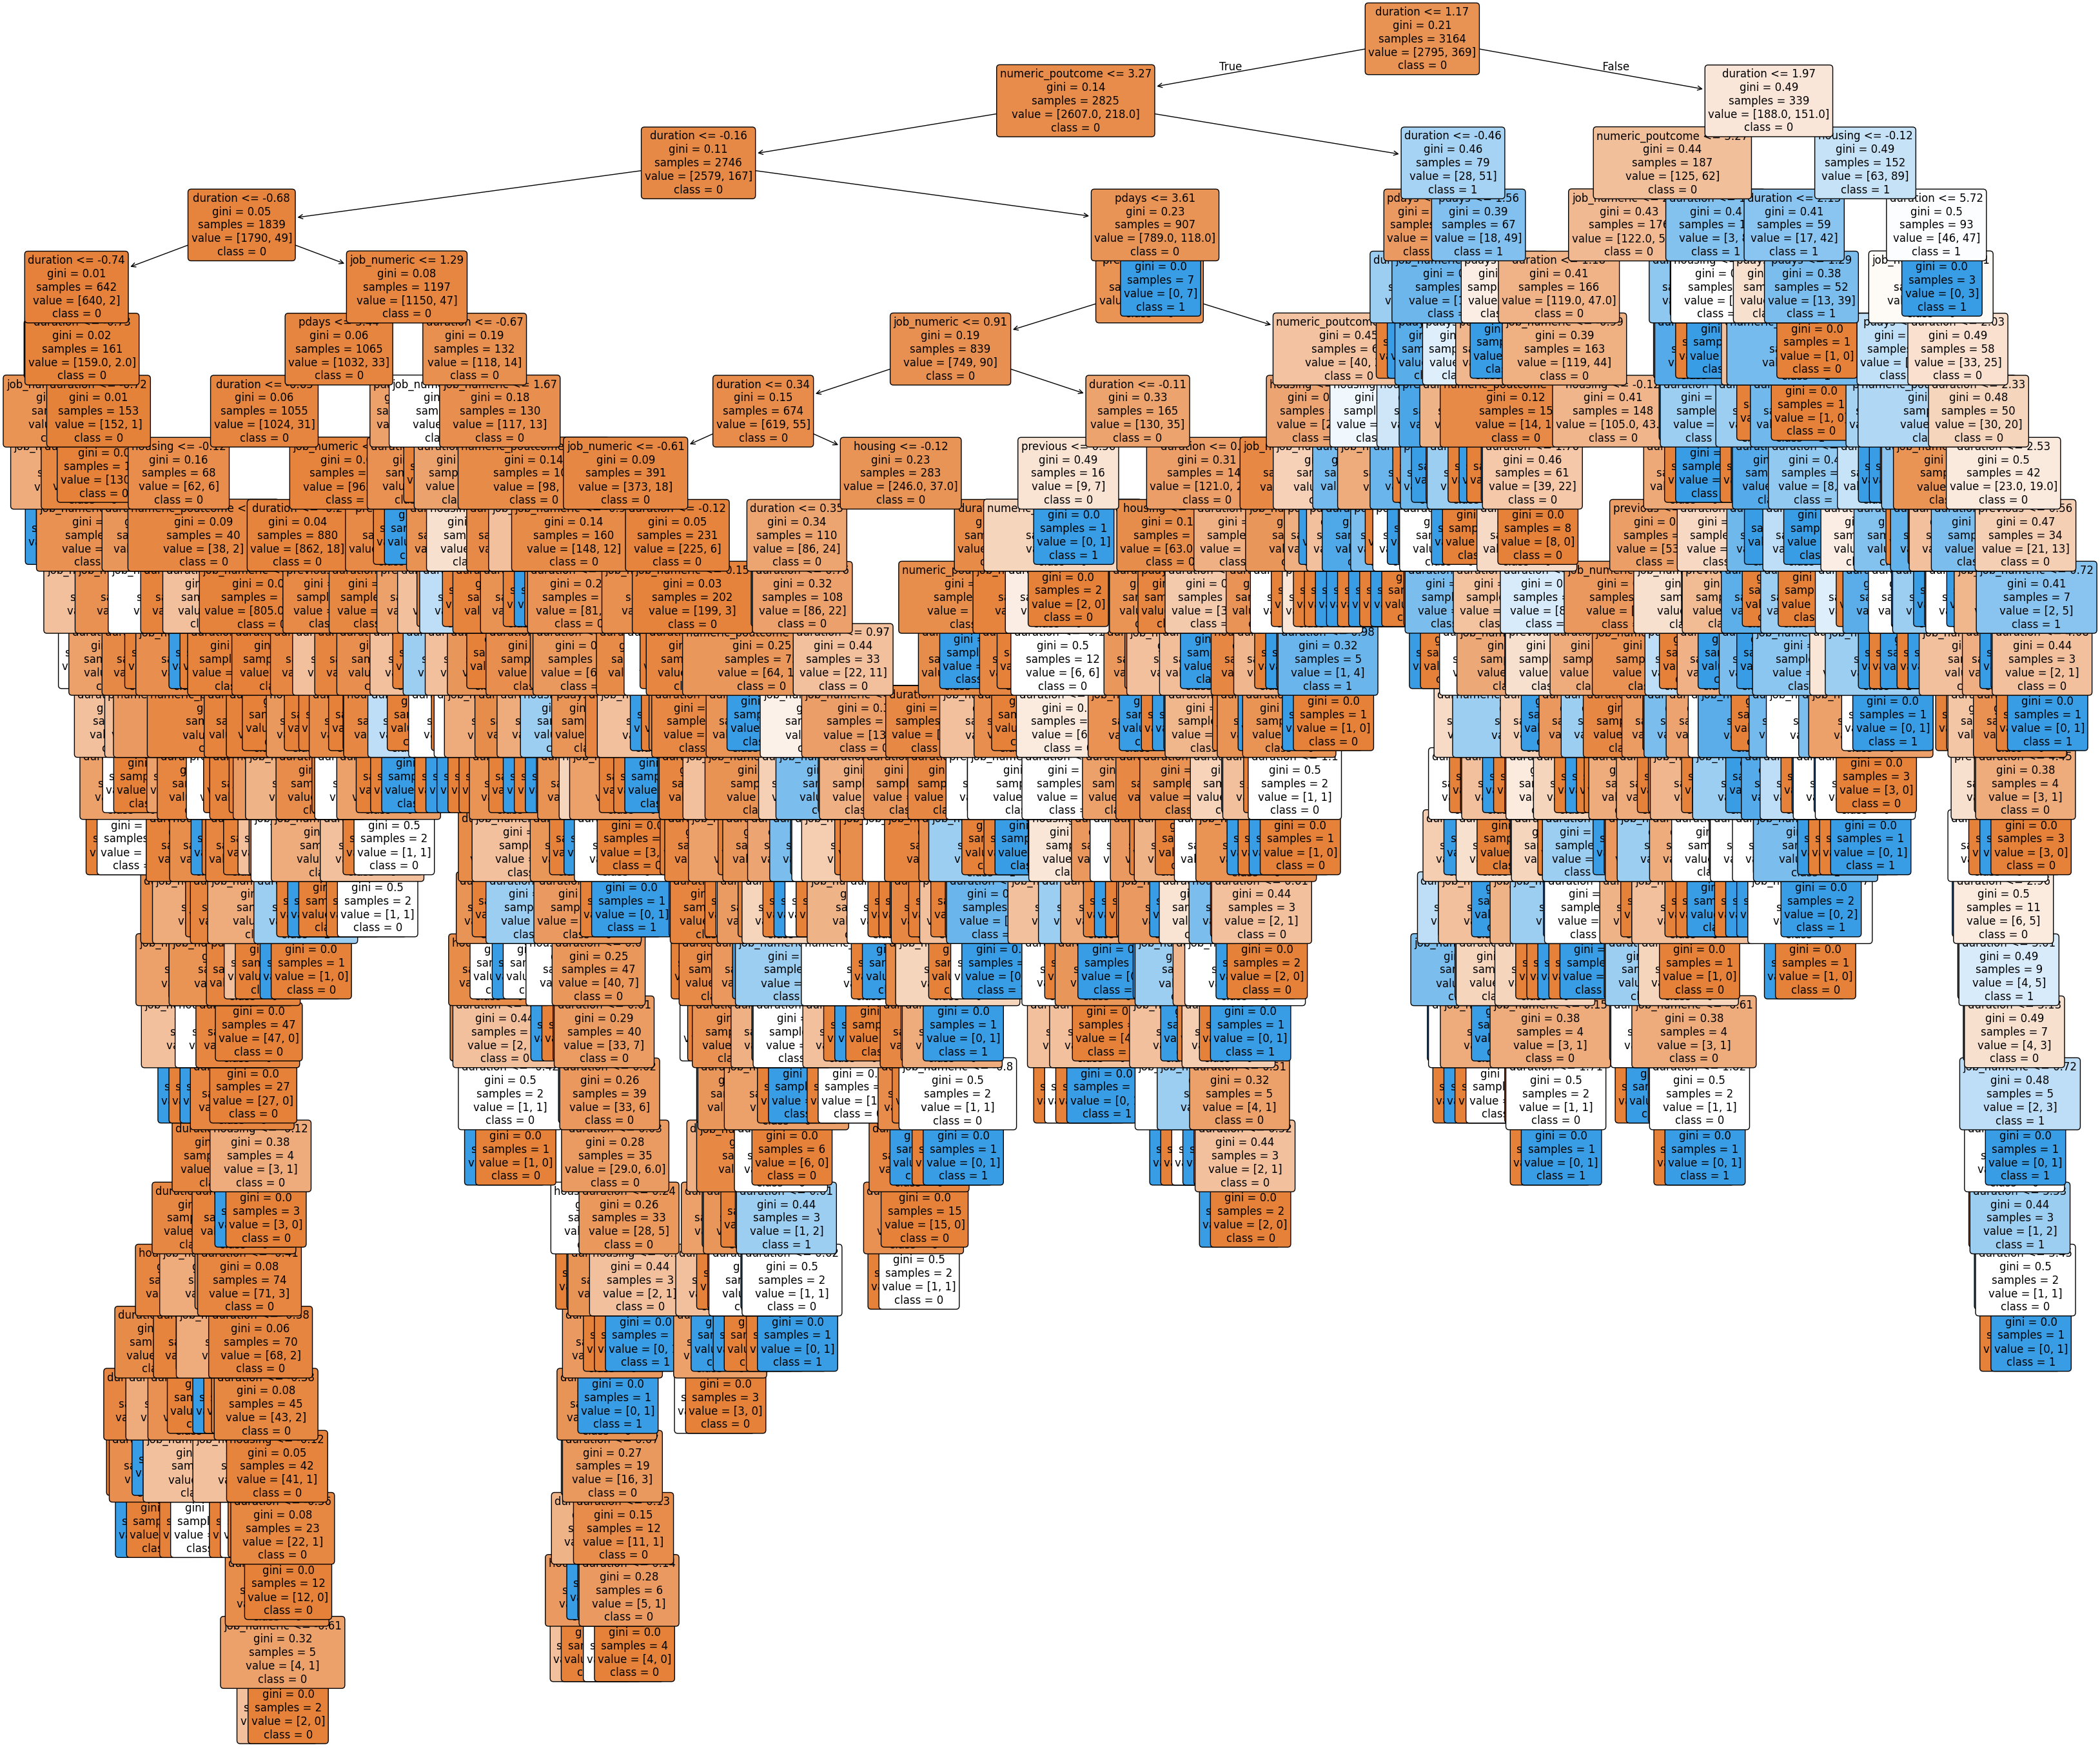

In [338]:
X = df2[['duration', 'housing', 'pdays', 'previous', 'numeric_poutcome', 'job_numeric']]
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

print(f"DT accuracy: {dt_accuracy}")
print("Confusion matrix")
print(dt_confusion_matrix)

plt.figure(figsize=(40,35))
plot_tree(dt_model, feature_names = X_train.columns, class_names = ['0', '1'], filled = True, rounded = True, fontsize = 12, precision=2)
plt.show()